In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## RC neuron simulation

tau = 50.000 ms
(Experimental)
5000


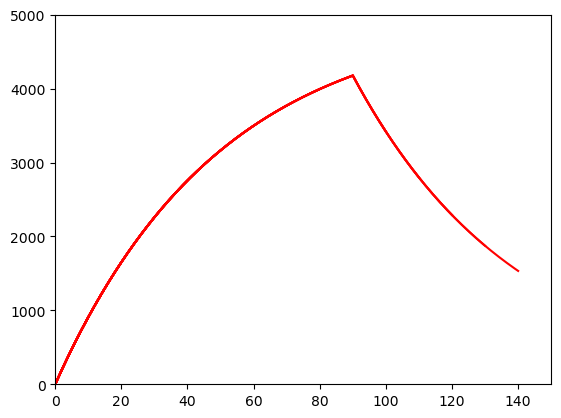

In [21]:
# cell parameters

I = 10 # nA
C = 0.1 # nF
R = 500 # M ohms
tau = R*C # theoretical ms

# simulation parameters

t_stop = 150 # ms
V_inf = I*R # peak V (in mV)
tau = 0 # experimental (ms)

V = 0 # mV
V_trace = [V] # mV

h = 0.2 # ms (step size)

for t in np.arange(h, t_stop, h):

    # euler method: V(t+h) = V(t) + h*dV/dt
    V = V + h*(-(V/(R*C)) + (I/C))

    # verify membrane time constant
    if not tau and (V > 0.6321 * V_inf):
        tau = t
        print('tau = %.3f ms' % tau)
        print('(Experimental)')

    # stop current injection 
    if t >= 0.6*t_stop:
        I = 0

    V_trace += [V]
    if t % 10 == 0:
        plt.plot(np.arange(0,t+h, h), V_trace, color='r')
        plt.xlim(0, t_stop)
        plt.ylim(0, V_inf)
        plt.draw()


print(V_inf)

plt.show()


## LIF neuron simulation

34


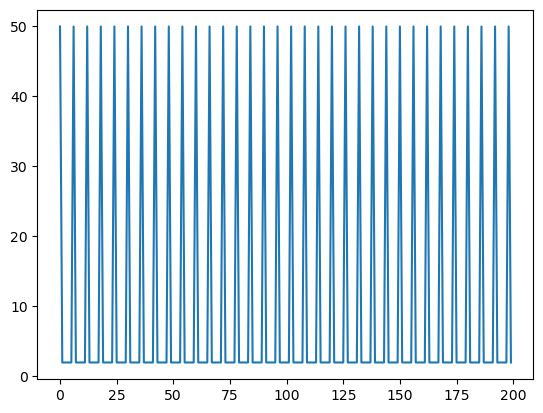

In [38]:
# input current
I = 1000 # nA

# capacitance and leak resistance
C = 1 # nF
R = 40 # M ohms

# I & F implementation dV/dt = - V/RC + I/C
# Using h = 1 ms step size, Euler method

V = 0
tstop = 200
abs_ref = 5 # absolute refractory period 
ref = 0 # absolute refractory period counter
V_trace = []  # voltage trace for plotting
V_th = 10 # spike threshold

count = 0

for t in range(tstop):

    if not ref:
        V = V - (V/(R*C)) + (I/C)
    else:
        ref -= 1
        V = 0.2 * V_th # reset voltage

    if V > V_th:
        V = 50 # emit spike
        ref = abs_ref # set refractory counter
        count+=1

    V_trace += [V]

print(count)

plt.plot(V_trace)
plt.show()

## noisy integrate and fire

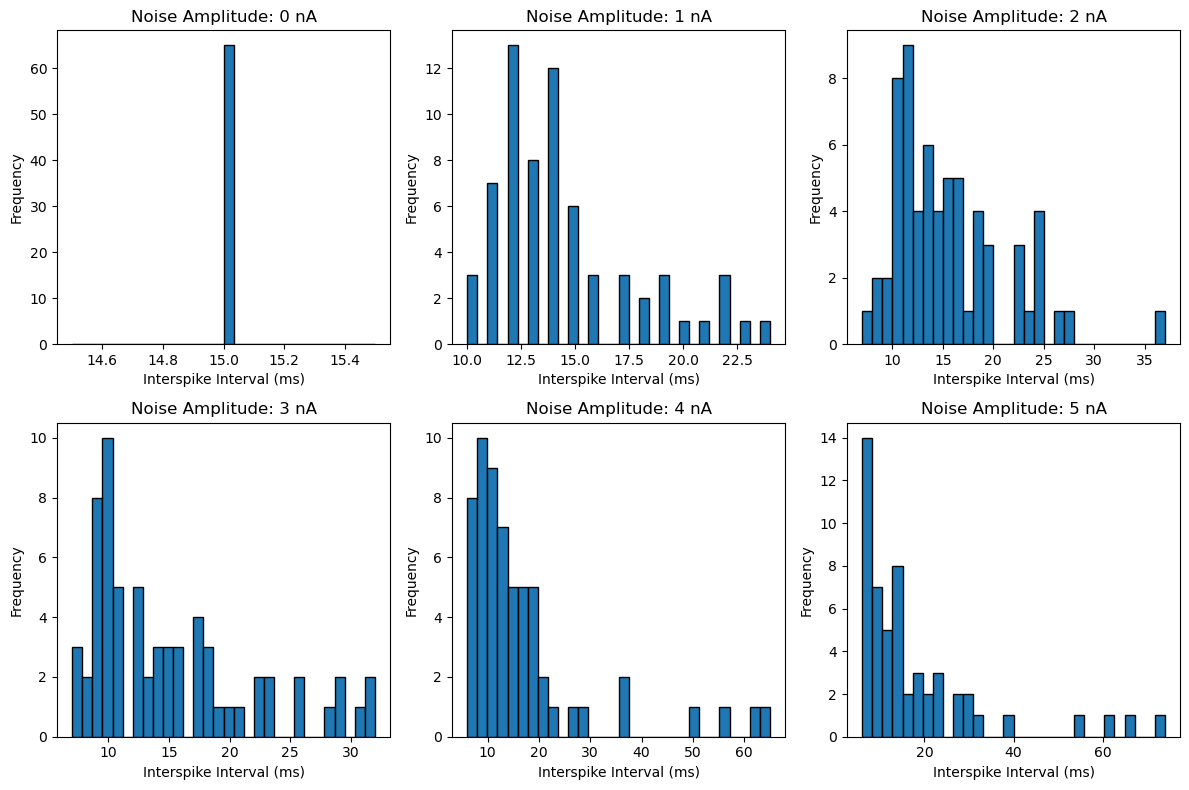

In [65]:
# Simulation parameters
I_base = 1 # nA
C = 1 # nF
R = 40 # M ohms
V_th = 10 # spike threshold
abs_ref = 5 # absolute refractory period
tstop = 1000 # ms, increased to get a well-sampled histogram
noise_amplitudes = [0, 1, 2, 3, 4, 5] # nA

# Function to run the simulation
def run_simulation(noise_amp):
    V = 0
    ref = 0
    V_trace = []
    spiketimes = []

    I = I_base + noise_amp * np.random.normal(0, 1, tstop) # nA; Gaussian noise

    for t in range(tstop):
        if not ref:
            V = V - (V/(R*C)) + (I[t]/C)
        else:
            ref -= 1
            V = 0.2 * V_th # reset voltage

        if V > V_th:
            V = 50 # emit spike
            ref = abs_ref # set refractory counter
            spiketimes.append(t)

        V_trace.append(V)

    return spiketimes

# Run simulations for different noise amplitudes and plot ISI histograms
plt.figure(figsize=(12, 8))

for i, noise_amp in enumerate(noise_amplitudes):
    spiketimes = run_simulation(noise_amp)
    ISI = np.diff(spiketimes)

    plt.subplot(2, 3, i+1)
    plt.hist(ISI, bins=30, edgecolor='black')
    plt.title(f'Noise Amplitude: {noise_amp} nA')
    plt.xlabel('Interspike Interval (ms)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()